# 11. Word Embedding Model
A word embedding is a learning representation for text where words that have the same meaning and have similar representation. 

Using a dense distribution representation for each word. The feature vector represents different aspects of word, each word is associated with a point in a vector space. The distributed representation is learned based on the usage of words. The same meaning has the similar ways to result in having similar representations (bag-of-words model) 

## 11.1. Word Embedding Algorithms
The methods learn a real-valued vector representation for predefined fixed sized vocabulary from a corpus of text. The learning process is either joint with the neural network model on some task, such as document classification, or is an unsupervised process, using document statistics.

## 11.1.1. Embedding Layer technique
The word embedding that is learned jointly with a neural network model on a specific natural language processing task, such as language modeling or document classification. It requires that document text be cleaned and prepared
such that each word is one hot encoded. The size of the vector space is specified as part of the model, such as 50, 100, or 300 dimensions. The vectors are initialized with small random numbers. The embedding layer is used on the front end of a neural network and is fit in a supervised way using the Backpropagation algorithm.

when the input to a neural network contains symbolic categorical features (e.g. features that take one of k distinct symbols, such as words from a closed vocabulary), it is common to associate each possible feature value (i.e., each word in the vocabulary) with a d-dimensional vector for some d. These vectors are then considered parameters of the model, and are trained jointly with the other parameters. (p.49, Neural network methods in natural language processing, 2017)

The one hot encoded words are mapped to the word vectors. If a Multilayer Perceptron model is used, then the word vectors are concatenated before being fed as input to the model. If a recurrent neural network is used, then each word may be taken as one input in a sequence. This approach of learning an embedding layer requires a lot of training data and can be slow, but will learn an embedding both targeted to the specific text data and the NLP task.

##  11.1.2. Word to Vector (word2vec) technique
Word2Vec is a statistical method for efficiently learning a standalone word embedding from a text corpus. It was developed by Tomas Mikolov, et al. at Google in 2013 as a response to make the neural-network-based training of the embedding more efficient and since then has become the de facto standard for developing pre-trained word embedding. Additionally, the work involved analysis of the learned vectors and the exploration of vector math on the representations of words. For example, that subtracting the man-ness from King and adding women-ness results in the word Queen, capturing the analogy king is to queen as man is to woman (linguistic regularities in continuous space word representation, 2013)

Two different learning models were introduced that can be used as part of the Word2Vec approach to learn the word embedding; they are:

*) Continuous Bag-of-Words (CBOW) model

*) Continuous Skip-gram model

The CBOW model learns the embedding by predicting the current word based on its context.The continuous skip-gram model learns by predicting the surrounding words given a current word.

Both models are focused on learning about words given their local usage context, where the context is defined by a window of neighboring words. This window is a configurable parameter of the model.

The size of the sliding window has a strong effect on the resulting vector similarities. Large windows tend to produce more topical similarities [...], while smaller windows tend to produce more functional and syntactic similarities. — Page 128, Neural Network Methods in Natural Language Processing, 2017.

## 11.1.3. GloVe technique
The Global Vectors for Word Representation, or GloVe, algorithm is an extension to the Word2Vec method for efficiently learning word vectors, developed by Pennington, et al. at Stanford. Classical vector space model representations of words were developed using matrix factorization techniques such as Latent Semantic Analysis (LSA) that do a good job of using global text statistics but are not as good as the learned methods like Word2Vec at capturing meaning and demonstrating it on tasks like calculating analogies (e.g. the King and Queen
example above).

GloVe is an approach to marry both the global statistics of matrix factorization techniques like LSA with the local context-based learning in Word2Vec. Rather than using a window to define local context, GloVe constructs an explicit word-context or word co-occurrence matrix using statistics across the whole text corpus. The result is a learning model that may result in generally better word embeddings.

GloVe, is a new global log-bilinear regression model for the unsupervised learning of word representations that outperforms other models on word analogy, word similarity, and named entity recognition tasks.
— GloVe: Global Vectors for Word Representation, 2014.

## 11.2. Learn an embedding by training
### Learn it Standalone
where a model is trained to learn the embedding, which is saved and used as a part of another model for your task later. This is a good approach if you would like to use the same embedding in multiple models.
### Learn Jointly 
where the embedding is learned as part of a large task-specific model. This is a good approach if you only intend to use the embedding on one task.

## 11.3. Reuse an Embedding
It is common for researchers to make pre-trained word embeddings available for free, often under a permissive license so that you can use them on your own academic or commercial projects. For example, both Word2Vec and GloVe word embeddings are available for free download. These can be used on your project instead of training your own embeddings from scratch. You have two main options when it comes to using pre-trained embeddings:
### Static
where the embedding is kept static and is used as a component of your model.This is a suitable approach if the embedding is a good fit for your problem and gives good results.
### Updated
where the pre-trained embedding is used to seed the model, but the embedding is updated jointly during the training of the model. This may be a good option if you are looking to get the most out of the model and embedding on your task.
## References
#### Distributional structure, 1956.
http://www.tandfonline.com/doi/pdf/10.1080/00437956.1954.11659520
#### A Neural Probabilistic Language Model, 2003.
http://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf
#### A Unified Architecture for Natural Language Processing: Deep Neural Networks with Multitask Learning, 2008.
https://ronan.collobert.com/pub/matos/2008_nlp_icml.pdf
#### Continuous space language models, 2007.
https://pdfs.semanticscholar.org/0fcc/184b3b90405ec3ceafd6a4007c749df7c363.pdf
#### Efficient Estimation of Word Representations in Vector Space, 2013.
https://arxiv.org/pdf/1301.3781.pdf
#### Distributed Representations of Words and Phrases and their Compositionality, 2013.
https://arxiv.org/pdf/1310.4546.pdf
#### GloVe: Global Vectors for Word Representation, 2014.
https://nlp.stanford.edu/pubs/glove.pdf

### Articles
####  Word embedding on Wikipedia.
https://en.wikipedia.org/wiki/Word_embedding
####  Word2Vec on Wikipedia.
https://en.wikipedia.org/wiki/Word2vec
####  GloVe on Wikipedia
https://en.wikipedia.org/wiki/GloVe_(machine_learning)
####  An overview of word embeddings and their connection to distributional semantic models,
2016.
http://blog.aylien.com/overview-word-embeddings-history-word2vec-cbow-glove/
####  Deep Learning, NLP, and Representations, 2014.
http://colah.github.io/posts/2014-07-NLP-RNNs-Representations/

In [1]:
from gensim.models import Word2Vec
from nltk.corpus import stopwords


# define training data
sentences = ['the italia got the first wave of covid in european',
    'euro has declared the covid as the world pandemic',
    'germany and france are the first country that approve covid vaccine for elder in european',
    'germany has more than ninety nine million people had twice vaccinations',
    'the country keeping a rate of covid vaccination to elder people is high',
    'italia and germany have agreemance to open border together for elder people',
    'machine learning is a key in germany as well as the european']

sentences = [[w for w in sent.split()] for sent in sentences]
sentences = [[w for w in sent if not w in set(stopwords.words('english'))] for sent in sentences]

# train model
model = Word2Vec(sentences, min_count=1, epochs=50)
# summarize the loaded model
print(model)
# summarize vocabulary, word's features 
words = list(model.wv.key_to_index)
print(words)
# access vector for one word
print(model.wv.get_vector('germany', norm=True))
# save model
# model.save( 'model.bin' )
# load model
new_model = Word2Vec.load( 'model.bin' )
print(new_model)

Word2Vec(vocab=34, vector_size=100, alpha=0.025)
['germany', 'covid', 'people', 'european', 'elder', 'italia', 'first', 'country', 'approve', 'france', 'declared', 'pandemic', 'world', 'euro', 'wave', 'got', 'vaccine', 'well', 'key', 'nine', 'million', 'twice', 'vaccinations', 'keeping', 'rate', 'vaccination', 'high', 'agreemance', 'open', 'border', 'together', 'machine', 'learning', 'ninety']
[-0.0086009   0.00383597  0.08937919  0.15939538 -0.16302505 -0.12662566
  0.11557257  0.16349427 -0.09143683 -0.07028557  0.12871581 -0.02886604
 -0.07978323  0.11848927 -0.0857719  -0.03092378  0.05699851  0.0151328
 -0.14554407 -0.17434789  0.13075405  0.08923434  0.12392011  0.01293021
  0.11059292 -0.05773918 -0.01989475  0.10244048 -0.13164684 -0.06545581
 -0.12550665 -0.01889293  0.16753824 -0.13550712 -0.04203216 -0.03278988
  0.1433521  -0.10348036 -0.00089437 -0.08534226 -0.16721894  0.08402226
 -0.15384114 -0.07639773  0.00217437 -0.00834096 -0.13853681  0.16581586
  0.0892197   0.1637

## 11.3 Visualize word embedding
## 11.3.1 Plot word vectors using PCA

<IPython.core.display.Javascript object>


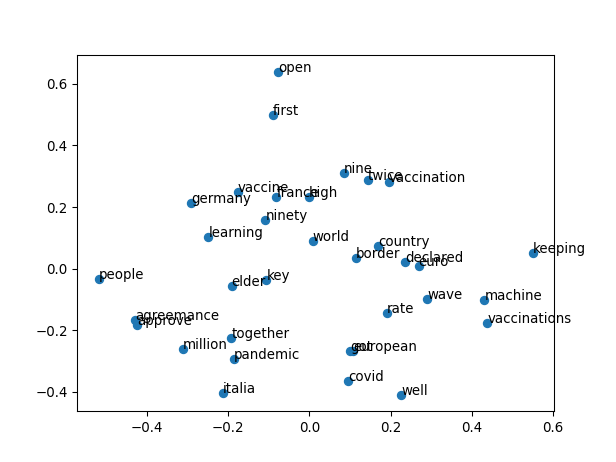

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib notebook

# X = [model.wv.get_index(word) for word in model.wv.key_to_index]
X = model.wv.get_normed_vectors() 
# print(X)
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0],result[i, 1]))
    
plt.show()

In [3]:
from sklearn.manifold import TSNE
%matplotlib inline
print(model.wv['covid'])

[-0.00861335  0.00369827  0.00516935  0.00578691  0.00745105 -0.00625364
  0.00124027  0.00627402 -0.00296301 -0.0063527  -0.00040036 -0.00845634
 -0.00563597  0.00720584  0.00330814  0.00723892  0.00709417  0.00745874
 -0.00380815 -0.0009281   0.00245178 -0.00450583  0.00864625 -0.00984387
  0.0067388   0.00296571 -0.00508721  0.0044575  -0.00175235  0.00683851
  0.01020604 -0.00443009 -0.00054733 -0.00598666  0.00379449  0.00281075
  0.00695463  0.00612333  0.00949477  0.00919878  0.00796174 -0.00712664
 -0.00916363 -0.00036453 -0.0029868   0.00778609  0.00577199 -0.00163594
  0.00159668  0.00188749  0.00782355 -0.00958591 -0.00027482  0.00346713
 -0.0010053   0.00833142  0.00911332  0.00648662 -0.00080903  0.00778166
 -0.00856512  0.00307593 -0.00440895 -0.00494149  0.00348711  0.00554596
  0.00779059 -0.0056662   0.00728778  0.00666728 -0.00362729 -0.00866351
  0.00553364  0.00654686 -0.0006297  -0.00683253 -0.00700757 -0.00234643
  0.00511323 -0.00369648 -0.00947567  0.00369541  0

<IPython.core.display.Javascript object>


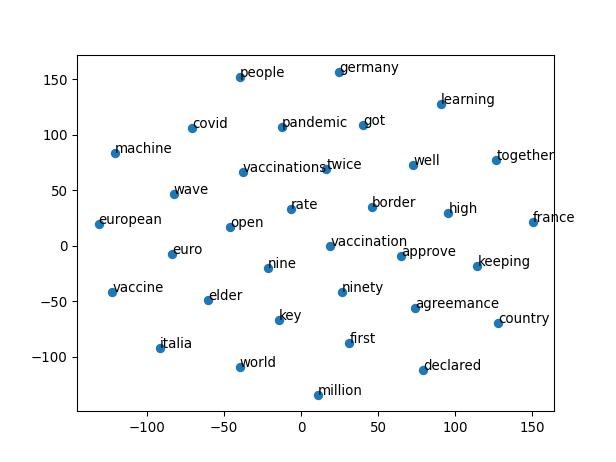

In [4]:
%matplotlib notebook
tsne = TSNE(perplexity=40, n_components=2, init='pca', random_state=23, n_iter=2500)
X = model.wv[model.wv.key_to_index]
result = tsne.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0],result[i, 1]))
plt.show()

### TSNE
TSNE is pretty useful when it comes to visualizing similarity between objects. It works by taking a group of high-dimensional (100 dimensions via Word2Vec) vocabulary word feature vectors, then compresses them down to 2-dimensional x,y coordinate pairs. The idea is to keep similar words close together on the plane, while maximizing the distance between dissimilar words.

t-SNE stands for t-distributed Stochastic Neighbor Embedding. The goal is to embed high-dimensional data in low dimensions in a way that respects similarities between data points. Nearby points in the high-dimensional space correspond to nearby embedded low-dimensional points, and distant points in high-dimensional space correspond to distant embedded low-dimensional points.


In [5]:
# words ranking
rank = model.wv.rank_by_centrality(words)
rank = sorted(rank, key=lambda item: -item[0])
display(rank)

[(0.33444905, 'key'),
 (0.32554233, 'country'),
 (0.31302702, 'germany'),
 (0.30176234, 'first'),
 (0.29128766, 'together'),
 (0.28241998, 'pandemic'),
 (0.2512982, 'covid'),
 (0.23647992, 'keeping'),
 (0.23323603, 'learning'),
 (0.22657165, 'people'),
 (0.21369676, 'high'),
 (0.20839258, 'well'),
 (0.20529017, 'border'),
 (0.2018949, 'euro'),
 (0.1992226, 'world'),
 (0.19688055, 'wave'),
 (0.19592917, 'vaccinations'),
 (0.18328223, 'elder'),
 (0.18231246, 'declared'),
 (0.18076873, 'vaccine'),
 (0.17364009, 'agreemance'),
 (0.16807088, 'nine'),
 (0.15908693, 'twice'),
 (0.15907636, 'open'),
 (0.1515094, 'italia'),
 (0.14846483, 'vaccination'),
 (0.13160206, 'france'),
 (0.10033155, 'million'),
 (0.09391357, 'approve'),
 (0.09136203, 'european'),
 (0.062722325, 'rate'),
 (0.044570662, 'ninety'),
 (0.042320453, 'got'),
 (-0.00076552853, 'machine')]

In [6]:
# most similarity words to the 'key' word
sim = model.wv.most_similar('key', topn=10)
display(sim)

[('covid', 0.1662331223487854),
 ('learning', 0.1637323945760727),
 ('people', 0.1614760011434555),
 ('euro', 0.14658929407596588),
 ('pandemic', 0.13729040324687958),
 ('well', 0.1240251436829567),
 ('border', 0.10154332965612411),
 ('country', 0.08871825039386749),
 ('first', 0.08406117558479309),
 ('vaccine', 0.06788406521081924)]

In [7]:
# for the germany
sim = model.wv.most_similar('germany', topn=10)
display(sim)

[('vaccine', 0.23017844557762146),
 ('france', 0.22457972168922424),
 ('open', 0.20789463818073273),
 ('together', 0.16253601014614105),
 ('learning', 0.12046950310468674),
 ('agreemance', 0.10939406603574753),
 ('country', 0.10763147473335266),
 ('world', 0.10563088953495026),
 ('pandemic', 0.08903681486845016),
 ('million', 0.08558913320302963)]

In [8]:
# what is similar to covid when germany is similar to pandemic
sim = model.wv.most_similar(positive=['covid', 'germany'], negative=['pandemic'], topn=1)
print(sim)

[('vaccine', 0.24047310650348663)]
